## Génération de figures pour le chapitre « Estimation ponctuelle ».

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
plt.rc('font', **{'family':'sans', 'size': 18})

matplotlib.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': [r'\usepackage{mathptmx}',],
    'text.latex.unicode': True,})

In [82]:
prop_cycle = plt.rcParams['axes.prop_cycle']
def_colors = prop_cycle.by_key()['color']

In [83]:
import scipy.stats as st

### Biais/variance

In [135]:
xxx = np.linspace(-5, 5, 500)

In [136]:
y = st.norm.pdf(xxx, 0, 1.)

In [137]:
y1 = st.norm.pdf(xxx, 1., 1.)

In [138]:
y2 = st.norm.pdf(xxx, 0, 1.5)

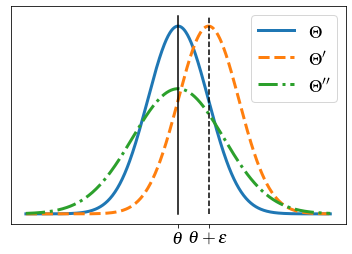

In [139]:
fig = plt.figure(figsize=(6, 4))
plt.plot(xxx, y, lw=3, label=r'$\Theta$')
plt.plot(xxx, y1, ls='--', lw=3, label=r'$\Theta^\prime$')
plt.plot(xxx, y2, ls='-.', lw=3, label=r'$\Theta^{\prime\prime}$')
plt.plot([0, 0], [0., 0.42], 'k')
plt.plot([1., 1.], [0, 0.42], 'k--')

t = plt.xticks([0, 1], [r'$\theta$', r'$\theta+\epsilon$'])
t = plt.yticks([], [])
plt.legend()
plt.savefig('../poly/figures/estimation/biais_variance.pdf', bbox_inches='tight')

### Estimation de Bayes

In [140]:
n = 30
b = 27
p = float(b)/n

In [141]:
print("MLE estimate: p = %.2f" % p)

MLE estimate: p = 0.90


In [142]:
beta = 2.
alpha = 8.
m = alpha/(alpha+beta)

In [143]:
print("espérance a priori: p = %.2f" % m)

espérance a priori: p = 0.80


In [144]:
bayes_estimate = (alpha + b)/(n + alpha + beta)
print("Bayes estimate: p = %.2f" % bayes_estimate)

Bayes estimate: p = 0.88


In [145]:
xxx = np.linspace(0., 1.0, 500)
y = st.beta.pdf(xxx, alpha, beta)

In [146]:
y2 = st.beta.pdf(xxx, (b+alpha), (n-b+beta))

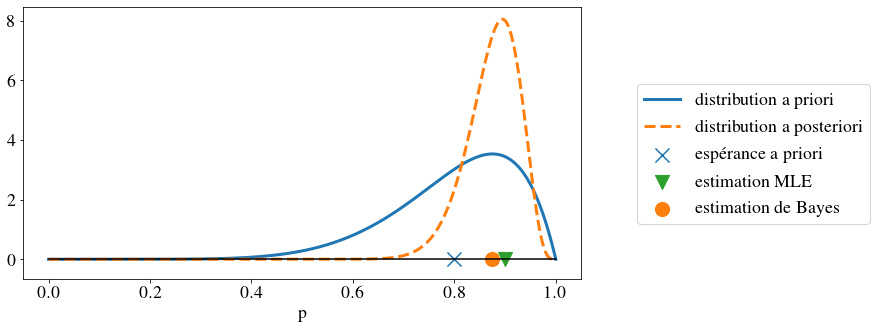

In [148]:
plt.figure(figsize=(10, 5))

plt.plot(xxx, y, lw=3, label='distribution a priori')

plt.plot(xxx, y2, lw=3, ls='--', label='distribution a posteriori')

plt.plot([0, 1], [0, 0], 'k')

# espérance a priori
#plt.plot([m, m], [0, np.max(y2)], c=def_colors[0], label='espérance a priori')
plt.scatter(m, 0, s=200, marker='x', c=def_colors[0], label='espérance a priori')

# MLE
#plt.plot([p, p], [0, np.max(y2)], c=def_colors[2])
plt.scatter(p, 0, s=200, marker='v', c=def_colors[2], label='estimation MLE')

# Bayes estimate
#plt.plot([bayes_estimate, bayes_estimate], [0, np.max(y2)], c=def_colors[1])
plt.scatter(bayes_estimate, 0, s=200, marker='o', c=def_colors[1], label='estimation de Bayes')

t=plt.xlabel("p")
plt.legend(loc=(1.1, 0.2))

plt.savefig('../poly/figures/estimation/bayes_estimate.pdf', bbox_inches='tight')